[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dancsomarci/Self-Driving-in-Duckietown/blob/milestone_1/Visualization.ipynb)

In [4]:
# Importing dependencies
from matplotlib import pyplot as plt
import zipfile
import pickle
import os

In [3]:
%matplotlib inline 

In [11]:
# Download raw dataset from google drive
!gdown 1ijLy-ApHuiVXo78gSbi7nqeRBXzZJHBl --output /tmp/savedData.zip
local_zip = '/tmp/savedData.zip'
raw_data_path = "/tmp/savedData/"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall(raw_data_path)
zip_ref.close()

Downloading...
From: https://drive.google.com/uc?id=1ijLy-ApHuiVXo78gSbi7nqeRBXzZJHBl
To: /tmp/savedData.zip
100%|██████████████████████████████████████| 34.9M/34.9M [00:04<00:00, 8.67MB/s]


In [12]:
raw_images = []
processed_images = []
labels = []

# Reading saved raw data into [labels, raw_images]
for filename in os.listdir(raw_data_path):
    file = open(os.path.join(raw_data_path, filename), "rb")
    for frame in pickle.load(file):
        label, image = frame
        raw_images.append(image)
        labels.append(label)

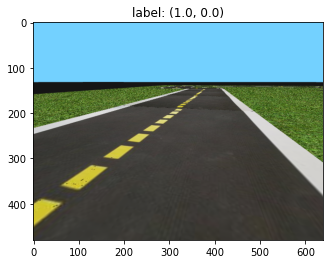

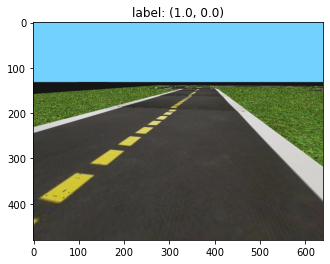

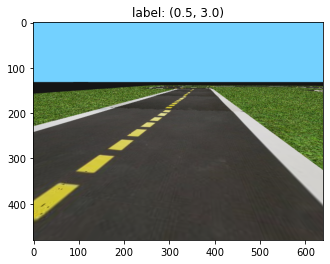

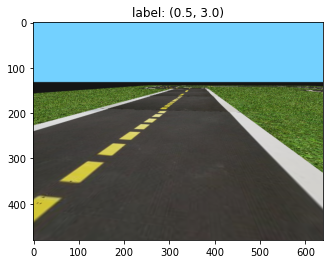

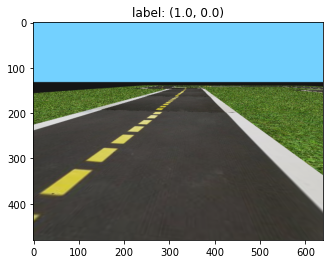

In [14]:
# Displaying raw data
for i in range(80, 85):
    plt.imshow(raw_images[i])
    plt.title("label: " + str(labels[i]))
    plt.show()

In [17]:
# Download processed dataset from google drive
!gdown 1NHJlZ4VhILZAPPh767jaG3sPO5wAL5fY --output /tmp/processedData.zip
local_zip = '/tmp/processedData.zip'
processed_data_path = "/tmp/processedData/"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall(processed_data_path)
zip_ref.close()

Downloading...
From: https://drive.google.com/uc?id=1NHJlZ4VhILZAPPh767jaG3sPO5wAL5fY
To: /tmp/processedData.zip
100%|███████████████████████████████████████| 61.1k/61.1k [00:00<00:00, 221kB/s]


In [18]:
processed_images = []

# Reading saved processed data into processed_images
for filename in os.listdir(processed_data_path):
    file = open(os.path.join(processed_data_path, filename), "rb")
    for frame in pickle.load(file):
        _, image = frame
        processed_images.append(image)

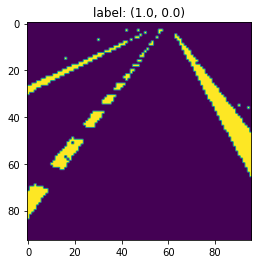

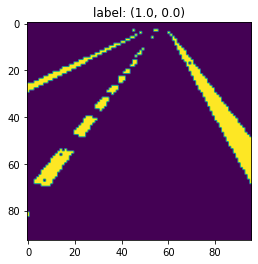

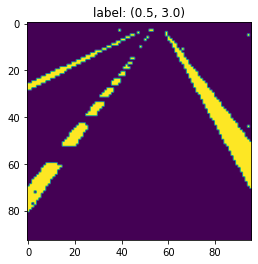

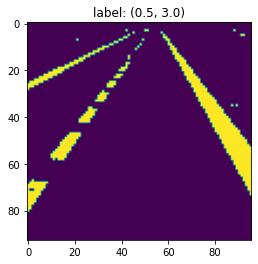

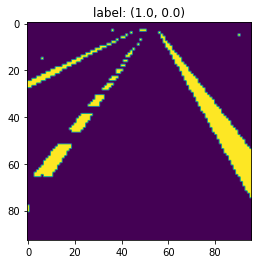

In [20]:
# Displaying processed data
for i in range(80, 85):
    plt.imshow(processed_images[i])
    plt.title("label: " + str(labels[i]))
    plt.show()

In [21]:
# Download splitted dataset from google drive
!gdown 1abnn0j48Bk9cvleB2p6q4xsa3wWEqZkA --output /tmp/splitData.zip
local_zip = '/tmp/splitData.zip'
split_data_path = "/tmp/splitData/"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall(split_data_path)
zip_ref.close()

Downloading...
From: https://drive.google.com/uc?id=1abnn0j48Bk9cvleB2p6q4xsa3wWEqZkA
To: /tmp/splitData.zip
100%|██████████████████████████████████████| 61.8k/61.8k [00:00<00:00, 2.29MB/s]


In [22]:
split = {"testing_data" : 0, "training_data" : 0, "validation_data" : 0}

# Reading saved processed data into split_data_path
for filename in os.listdir(split_data_path):
    file = open(os.path.join(split_data_path, filename), "rb")
    for frame in pickle.load(file):
        split[filename] += 1

print("training data count: " + str(split["training_data"]))
print("testing data count: " + str(split["testing_data"]))
print("validation data count: " + str(split["validation_data"]))

training data count: 93
testing data count: 12
validation data count: 11
